In [24]:
"""
Little analysis of the test/eval execution timings
"""

import pandas as pd
import numpy as np

def parseFile(filename):
    with open(filename,'r') as f:
        all=[]
        for data in f:

            info = data.split(',')

            timing=float (info[-1])
            #model=info[0][:-4].strip()
            model=info[0]#[:-4].strip()
          

            all.append([timing,model])
        return all
    

df1 = pd.DataFrame(parseFile('.\\data\\timings\\RandomForestorig.txt'))
df2 =pd.DataFrame(parseFile('.\\data\\timings\\Logisticreps.txt'))
df3 =pd.DataFrame(parseFile('.\\data\\timings\\Logisticorig.txt'))

df = pd.concat([df1, df2,df3], ignore_index=True)

colnames=['timing', 'model'] 
df.columns=colnames

In [25]:
evaluation_training_time_randomForest_original_Features=df[['model','timing']].groupby(['model']).agg(['count','mean', 'std', 'min', 'max'])
evaluation_training_time_randomForest_original_Features

timing                                      
                  count        mean       std     min     max
model                                                        
Logisticorig         32    8.197188  0.853842    7.16    9.97
Logisticreps         32    3.499375  1.816915    1.76   10.81
RandomForestorig     32  132.789062  5.849133  124.81  146.39

In [26]:
import seaborn as sns
#sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid") # , palette="muted"
sns.despine(left=True)

<Figure size 640x480 with 0 Axes>

C:\Users\seven\AppData\Local\Temp\ipykernel_12084\513782645.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Logistic Orig","Logistic Repss" ,"RandomForest Orig"],


[]

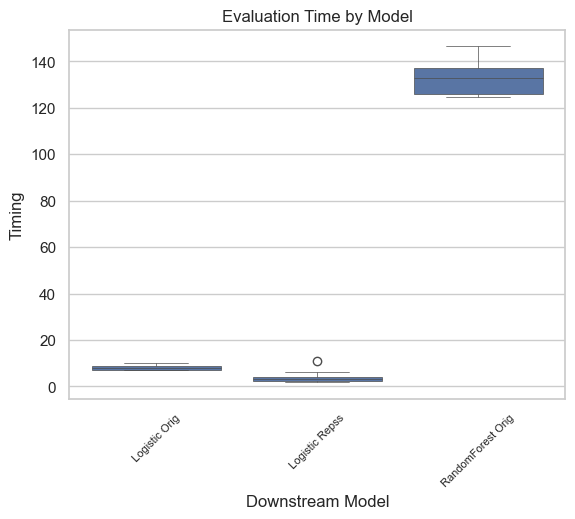

In [27]:
data=df[['model','timing']]

 
ax=sns.boxplot(x="model",
                y="timing"
                , data=data
                , order=["Logisticorig","Logisticreps" , "RandomForestorig"]
                , linewidth=0.5
                )


ax.set(xlabel='Downstream Model',ylabel='Timing')
ax.set_title('Evaluation Time by Model')
ax.set_xticklabels(["Logistic Orig","Logistic Repss" ,"RandomForest Orig"],
                    rotation=45, fontsize=8)
ax.plot()